# Using iris dataset to test the polynomial fitting

## Traditional polynomial fitting

Let us import the necessary packages first. As the boston_house dataset is embedded into the sklearn package, we will read the dataset directly from the sklearn package. Then we will assign the data and the target to X and y.

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
house=load_boston()
X=pd.DataFrame(house.data)
y=pd.DataFrame(house.target)

Now let us divide the X and y into training part and test part. Then via sklearn.preprocessing import PolynomialFeatures. In this problem we will set the degree to be 2. We could set the other numbers. 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_new=poly.fit_transform(X_train)
X_test_new=poly.fit_transform(X_test)

#print (X_train.shape)
#print (X_train_new.shape)
#print (X_test.shape)
#print (X_test_new.shape)

From sklearn let us import the LinearRegression. Then we could start our fitting. And from the final graph, it is approximately a straigh y=x line. So that means our fitting is meaningful.

14.17414502673853


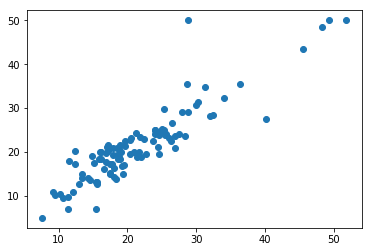

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

reg=LinearRegression()
reg.fit(X_train_new,y_train)
y_pred=reg.predict(X_test_new)
#print (y_pred)
#print (y_test)
print (MSE(y_test,y_pred))
print (plt.scatter(y_pred,y_test))

In this graph, we set the degree of polynomial fit to be 5. From this, we could observe that it changes a lot! And the MSE becomes approximately 6000! That is entirely not the result that we want.

RMSE is approximately 6000!
<img src="degreefive.png"> 

So, are there any methods? Yes. What we could use LASSO, ridge-regression and elastic-net to control this problem. Let us set the degree to be 5. Then we will implement LASSO, ridge-regression and elastic-net to fit the model.

5906.424569392585


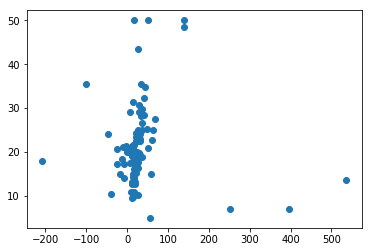

In [34]:
poly = PolynomialFeatures(degree=5)
X_train_new=poly.fit_transform(X_train)
X_test_new=poly.fit_transform(X_test)
reg=LinearRegression()
reg.fit(X_train_new,y_train)
y_pred=reg.predict(X_test_new)
#print (y_pred)
#print (y_test)
print (MSE(y_test,y_pred))
print (plt.scatter(y_pred,y_test))

## Lasso, Elastic-Net, RidgeRegression(Incomplete. There are some mistakes here)  

5906.424569392585


F:\annaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


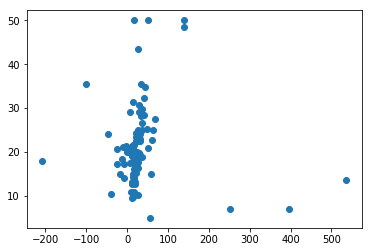

In [42]:
from sklearn import linear_model
regr_lasso=linear_model.Lasso(alpha=0.2,copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.001, warm_start=False)
regr_lasso.fit(X_train_new,y_train)
y_pred=reg.predict(X_test_new)

print (MSE(y_test,y_pred))
print (plt.scatter(y_pred,y_test))

5906.424569392585


F:\annaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


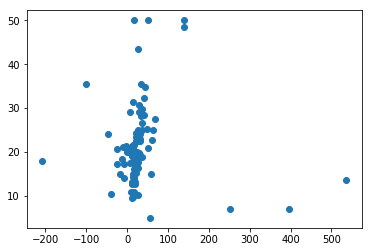

In [47]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=30000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
regr.fit(X_train_new, y_train)
y_pred=reg.predict(X_test_new)
print (MSE(y_test,y_pred))
print (plt.scatter(y_pred,y_test))